참고 문헌 : https://www.kaggle.com/code/subinium/kakr-eda/notebook

# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from glob import glob

# mpl 오류 수정
import matplotlib.font_manager as fm
font_location = '/Users/yujaehyeon/Downloads/nanum-gothic-coding/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

## 데이터 불러오기

In [2]:
path = glob('/Users/yujaehyeon/Desktop/DACON/Movie/data/영화 관객수/*')

In [3]:
path

['/Users/yujaehyeon/Desktop/DACON/Movie/data/영화 관객수/submission.csv',
 '/Users/yujaehyeon/Desktop/DACON/Movie/data/영화 관객수/movies_test.csv',
 '/Users/yujaehyeon/Desktop/DACON/Movie/data/영화 관객수/movies_train.csv']

In [4]:
train = pd.read_csv(path[2])
test = pd.read_csv(path[1])

# EDA

### pandas의 메서드로 보는 간단한 탐색
데이터를 불러온 후에는 기본적으로 어떤 형태의 데이터가 있는지 살펴볼 수 있으며 다음 메서드를 사용할 수 있습니다.

* .head() : 상위 5개, 괄호 안에 숫자로 갯수 변경 가능
* .tail() : 하위 5개, 괄호 안에 숫자로 갯수 변경 가능
* .sample() : 랜덤 5개, 괄호 안에 숫자로 갯수 변경 가능

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


* title : 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영 시간
* screening_rat : 상영 등급
* director : 감독명
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수
* num_staff : 스태프 수
* num_actor : 주연배우 수
* box_off_num : 관객 수

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* object인 feature는 대부분의 머신러닝 모델에 직접적인 입력 값으로 사용할 수 없으니 전처리 과정이 필요합니다.

---
* dir_prev_bfnum feature에 null값이 존재

In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
train.describe(include='O')

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [9]:
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[title] (600)
개들의 전쟁
내부자들
은밀하게 위대하게
나는 공무원이다
불량남녀
강철대오 : 구국의 철가방
길위에서
회사원
1789, 바스티유의 연인들
청춘그루브
AV 아이돌
무서운 집
해로
짓
철가방 우수氏
자유의 언덕
써니
별이 빛나는 밤
카트
하하하
두근두근 내 인생
성실한 나라의 앨리스
원령
관능의 법칙
안녕, 투이
영도
이웃집 좀비
러브앤서울 복숭아마을 도색소동기
무법자
일탈여행 : 프라이빗 아일랜드
로맨틱 헤븐
겨울나비
다이노 타임
물 없는 바다
오싹한 연애
마이 페어 웨딩
원나잇 온리
일대일
하늘의 황금마차
러브픽션
불타는 내 마음
끝과 시작
7월 32일
청춘학당 : 풍기문란 보쌈 야사
부당거래
콘돌은 날아간다
페어 러브
극적인 하룻밤
빅매치
극장판 뛰뛰빵빵 구조대 미션: 둥둥이를 구하라!
황구
워킹걸
나의 선택 - 잊혀진 가방 그 못다한 이야기
에스엠타운 더 스테이지
미조
원더풀 라디오
막걸스
미궁: 비밀애
파괴된 사나이
친구 2
              개를 훔치는 완벽한 방법
청춘정담
이방인들
간첩
그 참을 수 없는 맛
도리화가
의뢰인
열정같은소리하고있네
화끈한 써비스: 어느 잔인한 미용사의
세상끝의 사랑
어디로 갈까요?
완전 소중한 사랑
사물의 비밀
청포도 사탕: 17년 전의 약속
아저씨
원 오브 어 카인드 3D
사랑이 무서워
검은손
덕수리 5형제
별일아니다
바비
심야의 FM
만추
레인보우
더 파이브
두 개의 선
반창꼬
먹이사슬
야누스: 욕망의 두 얼굴
거짓말
인간중독
무적자
두 번의 결혼식과 한 번의 장례식
화창한 그날들
렛 미 아웃
경복
잉투기
사이비
두 개의 달
신이 보낸 사람
26년
관상
비념
퇴마: 무녀굴
풍산개
맨홀
봄
미국의 바람과 불
레드마리아
카페 서울
차형사
여행
범죄와의 전쟁: 나쁜놈들 전성시대
열여덟, 열아홉
무명인
북촌방향
오늘의 연애
그 사람 그 사랑 그 세상
라스트 갓파더
소녀괴담
미스진은 예쁘다
개똥이
변호인
아빠를 빌려드립니다
역린
하쿠나 마타타 - 지라니 이야기
울지마, 톤즈
심장이 뛰네
조선명탐정 

### 데이터의 분포를 살피는 시각화
데이터의 분포는 다음과 같이 살필 수 있습니다. 대표적인 몇 가지만 살펴보도록 하겠습니다.
* 범주형 : bar
* 수치형
    * 이산형 : bar
    * 연속형 : kdeplot, histogram
* 범주형 + 수치형 : boxplot, violinplot, etc
* 수치형 + 수치형 : scatter
> 이 외에도 다양한 방법이 존재하니 찾아보시는 것을 추천

### 범주형 데이터의 분포
그 전에 범주형 feature의 unique한 범주 개수를 세어보겠습니다.

In [10]:
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')

[title] (600)
[distributor] (169)
[genre] (12)
[release_time] (330)
[screening_rat] (4)
[director] (472)


* 전반적으로 범주의 수가 많아 전처리 이전에는 2개 이상의 feature를 한 plot에서 보기에는 조금 효율성이 떨어질 것 처럼 보입니다. 
* pandas의 value_counts를 사용하면 같은 범주의 개수를 쉽게 셀 수 있습니다.

In [11]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

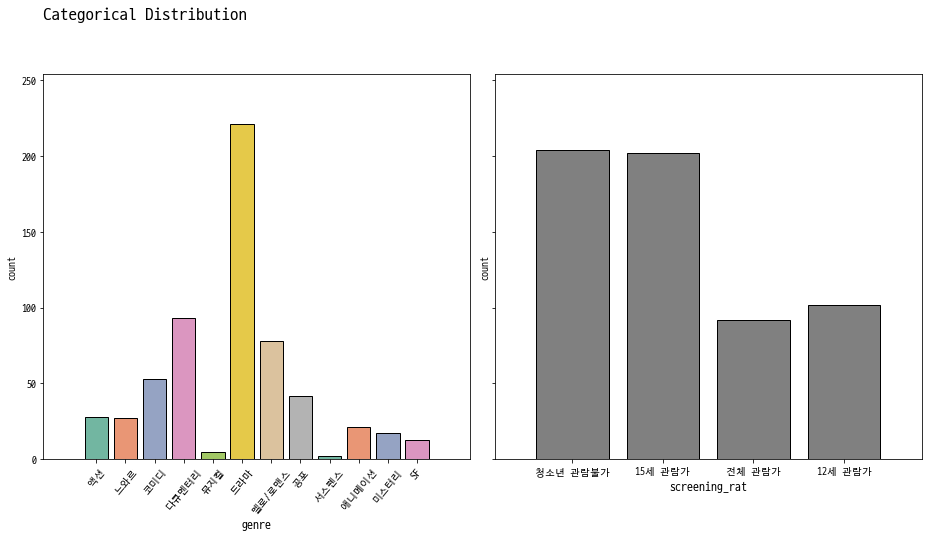

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharey=True)

sns.countplot(x='genre', data=train, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x='screening_rat', data=train, ax=axes[1], color='gray', edgecolor='black') 

# Margin & Label 조정
for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

    
# figure title    
plt.suptitle('Categorical Distribution', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=50 )

plt.tight_layout()
plt.show()

### 수치형 데이터의 시각화